In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("../data/raw/data.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


In [4]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Quick check
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


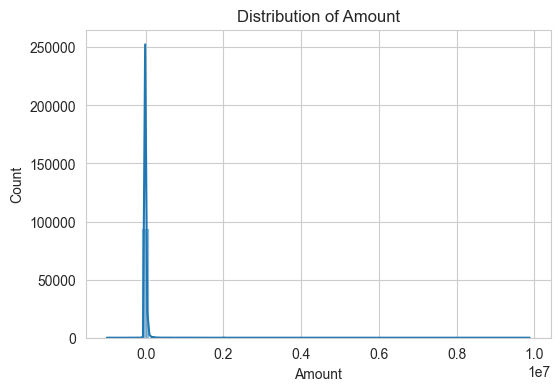

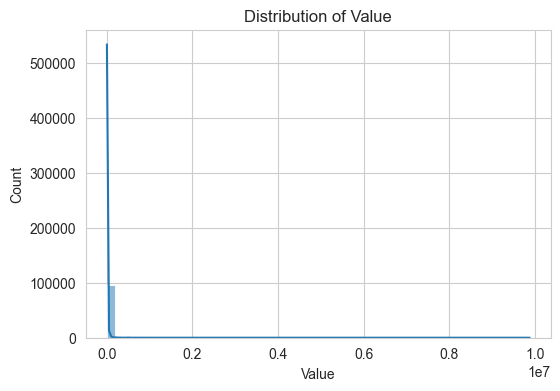

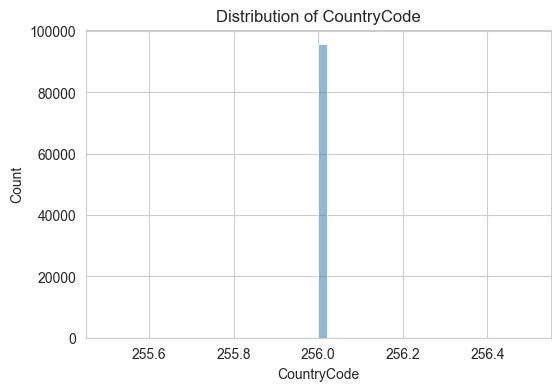

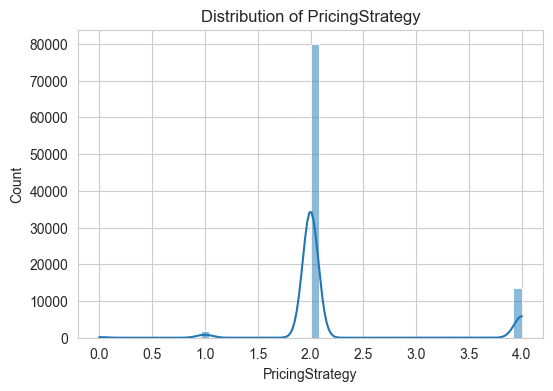

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Amount", "Value", "CountryCode", "PricingStrategy"]

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
    else:
        print(f"Column {col} not found in DataFrame")

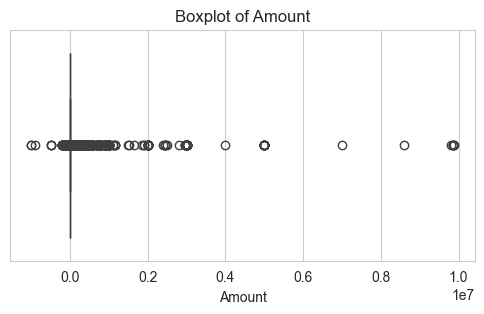

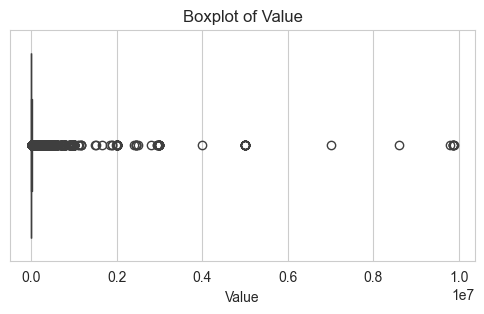

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ["Amount", "Value"]:
    if col in df.columns:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()
    else:
        print(f"Column {col} not found in DataFrame")


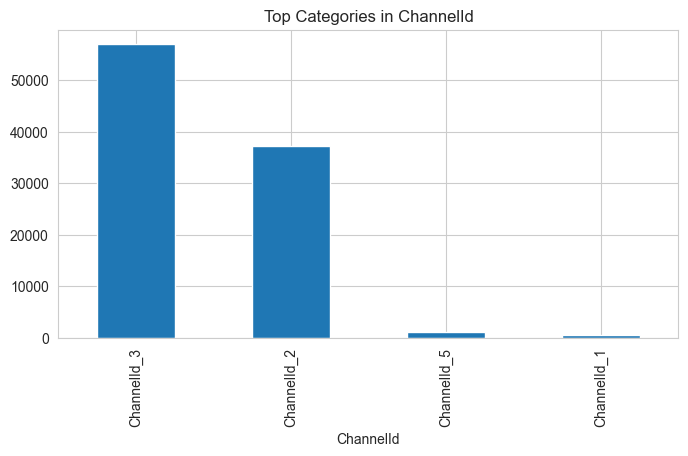

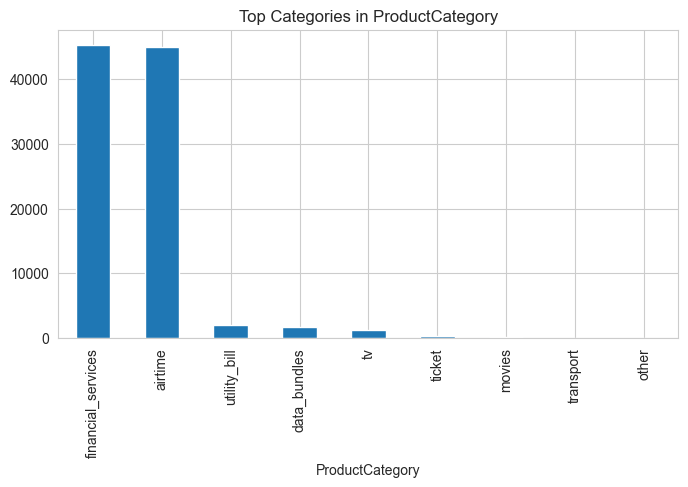

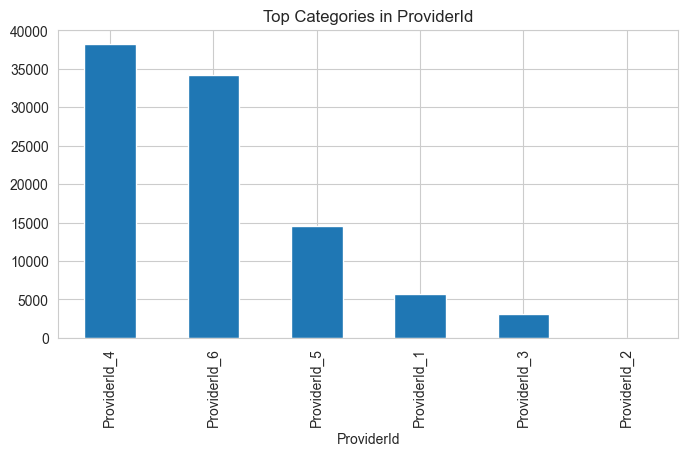

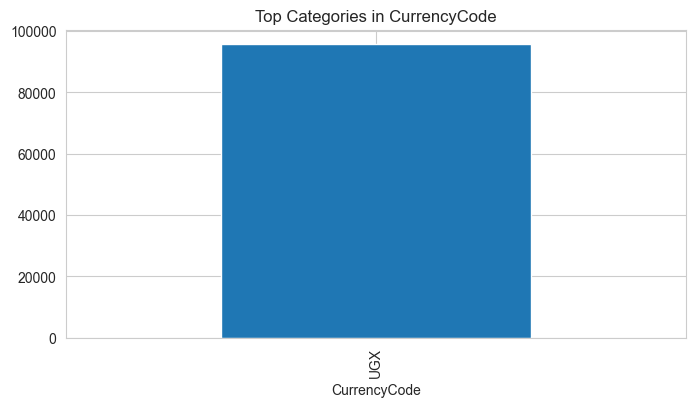

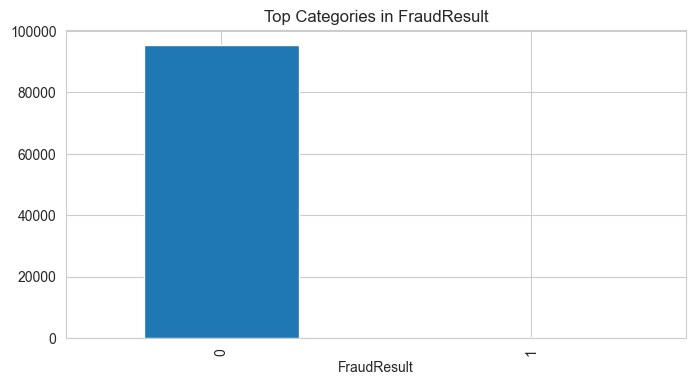

In [7]:
# Strip whitespace from column names to avoid KeyErrors
df.columns = df.columns.str.strip()

cat_cols = [
    "ChannelId",
    "ProductCategory",
    "ProviderId",
    "CurrencyCode",
    "FraudResult"
]

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        df[col].value_counts().head(10).plot(kind="bar")
        plt.title(f"Top Categories in {col}")
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame")

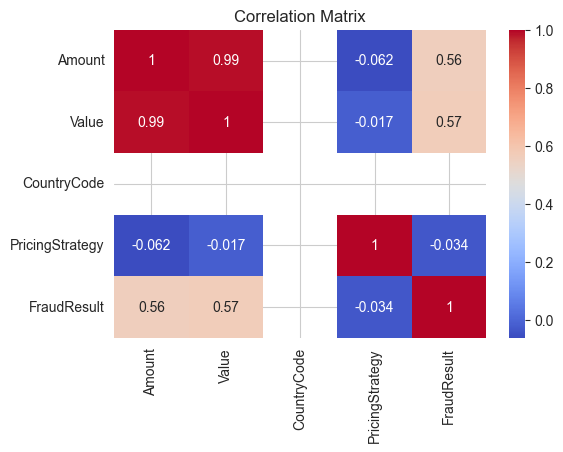

In [8]:
corr = df[["Amount", "Value", "CountryCode", "PricingStrategy", "FraudResult"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [9]:
#Missing Values
df.isnull().sum().sort_values(ascending=False)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

## Key EDA Insights

1. The dataset is transaction-level and highly imbalanced across customers, requiring aggregation to customer-level features for modeling.
2. Transaction Amount and Value distributions are heavily right-skewed with extreme outliers, indicating the need for robust scaling or transformation.
3. Several categorical features (e.g., ProductCategory, ChannelId) show strong imbalance, suggesting careful encoding to avoid sparse feature explosion.
4. FraudResult is highly imbalanced, making it unsuitable as a direct proxy for credit default.
5. Weak linear correlations among numerical variables highlight the importance of engineered behavioral features such as RFM metrics.
